# Trabalho análise multivariada

### Fernanda Fanchin Schwarz - 12675486

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
df.shape

(159, 7)

# 1. Análise Descritiva

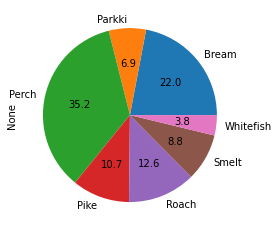

In [8]:
df.groupby('Species').size().plot(kind='pie', autopct='%.1f')

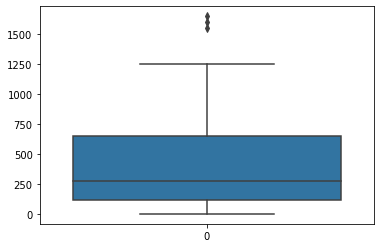

In [9]:
sns.boxplot(data=df['Weight'])

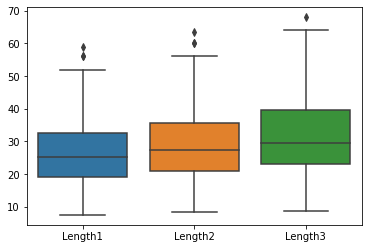

In [10]:
sns.boxplot(data=df[['Length1', 'Length2', 'Length3']])

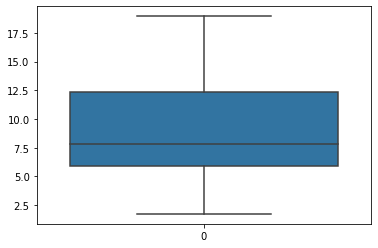

In [11]:
sns.boxplot(data=df['Height'])

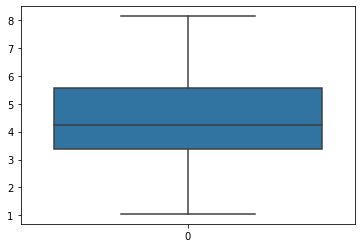

In [12]:
sns.boxplot(data=df['Width'])

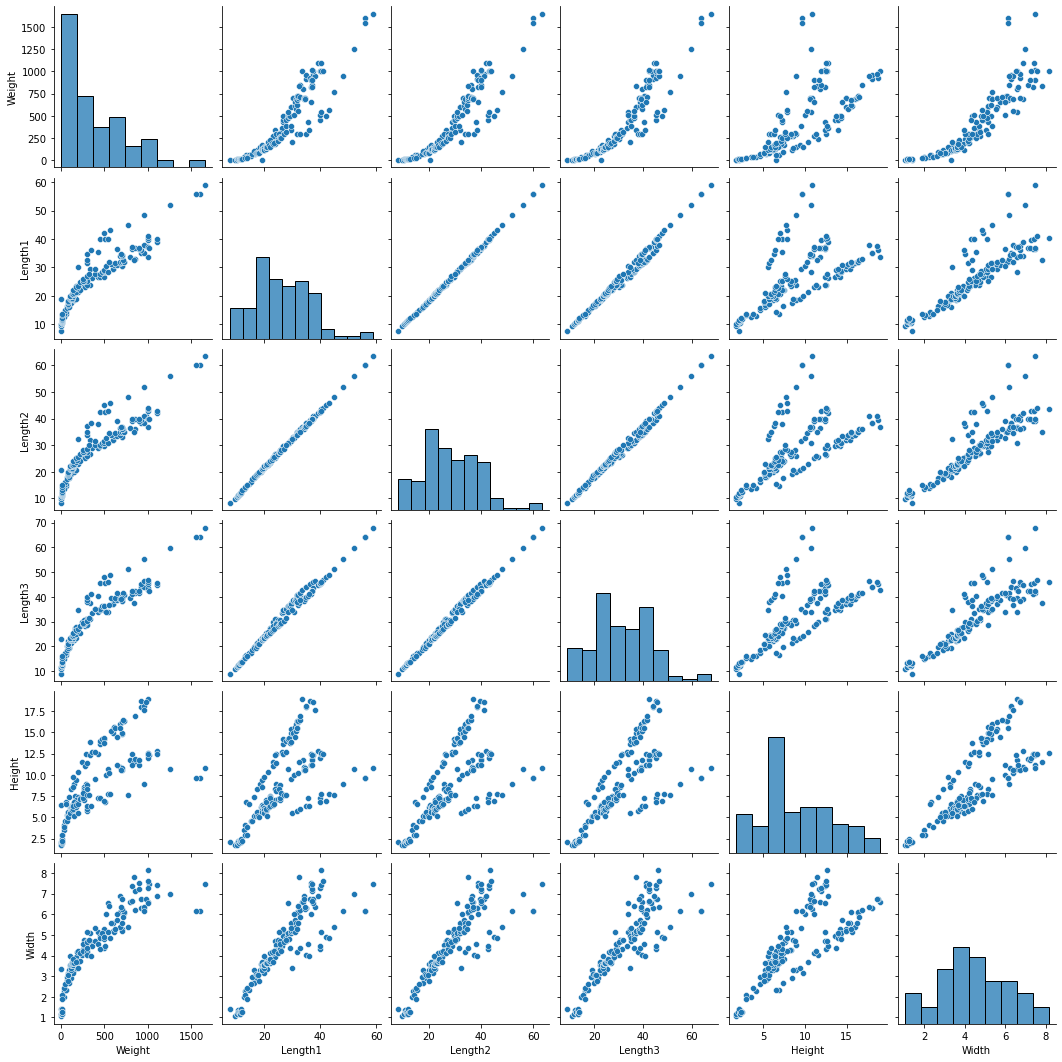

In [29]:
sns.pairplot(df)

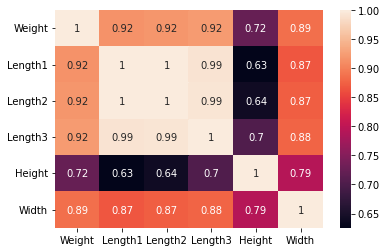

In [14]:
sns.heatmap(df.corr(), annot=True)

# 2. Regressão Múltipla

Aqui vamos prever o peso do peixe usando regressão múltipla

In [15]:
model = smf.ols(formula='Weight ~ Length1 + Length2 + Length3 + Height + Width', data=df)
result = model.fit()
y_pred = result.predict()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           4.95e-70
Time:                        19:05:28   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -499.5870     29.572    -16.894      0.0

Com 95% de confiança, vemos pelo p-valor que somente a covariável 'Height' é significativa para o modelo. Além disso, vemos que a regressão é significante ao analisarmos a estatística F e também que o modelo se ajusta razoavelmente bem aos dados ao ver o valor do $R^2$

In [33]:
model = smf.ols(formula='Weight ~ Length3 + Height', data=df)
result = model.fit()
y_pred = result.predict()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     492.0
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           4.20e-68
Time:                        19:07:34   Log-Likelihood:                -1002.0
No. Observations:                 159   AIC:                             2010.
Df Residuals:                     156   BIC:                             2019.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -501.0970     30.559    -16.398      0.0

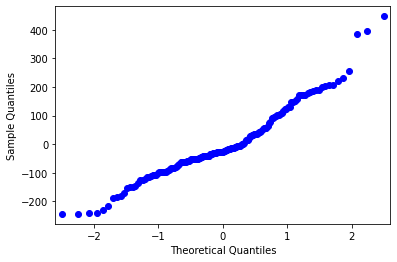

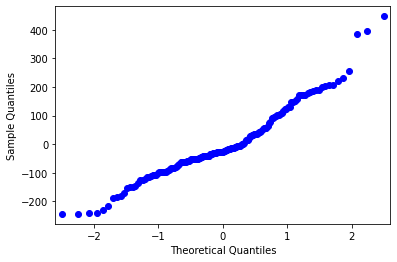

In [16]:
sm.qqplot(result.resid)

Aqui, ao analisar o resíduo em um qq-plot, vemos que este se comporta conforme o esperado, seguindo uma distribuição semelhante a normal

# 3. PCA

In [17]:
#Primeiro vamos selecionar todas as features que vamos usar, excluindo a variável categórica, que será o nosso target
features = ['Weight',	'Length1',	'Length2',	'Length3',	'Height',	'Width']
x = df[features].values
x = StandardScaler().fit_transform(x) #Aqui vamos normalizar os dados para podermos realizar o PCA

In [18]:
x.shape

(159, 6)

In [19]:
np.mean(x),np.std(x) #Verificando se os dados foram normalizados

(-8.565242621846072e-17, 1.0)

In [20]:
cov = np.cov(x.T)
eig_vals, eig_vecs = np.linalg.eig(cov)

In [21]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("A variância relativa para cada componente, em razão da variância total, é \n",var_exp, "\n")

print("Variância cumulativa conforme passamos por cada componente \n", cum_var_exp)

A variância relativa para cada componente, em razão da variância total, é 
 [87.83008931367957, 8.508548156969637, 2.005041896940102, 1.62545202287089, 0.026243582502894984, 0.004625027036905315] 

Variância cumulativa conforme passamos por cada componente 
 [ 87.83008931  96.33863747  98.34367937  99.96913139  99.99537497
 100.        ]


Como podemos ver na variância cumulativa, com as 2 primeiras componentes temos representamos 96% da variância dos dados. Logo vamos utilizar 2 componentes principais, sendo que a primeira representa 87.8% da variância e a segunda 8.5%.

In [22]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [23]:
normalised_fish = pd.DataFrame(x,columns=feat_cols) #Criando um Data Frame com as features normalizadas

In [24]:
pca_fish = PCA(n_components=2) #Aplicando o PCA com duas componentes
principalComponents_fish = pca_fish.fit_transform(x)

In [25]:
principal_fish_Df = pd.DataFrame(data = principalComponents_fish
             , columns = ['principal component 1', 'principal component 2'])

<Figure size 432x288 with 0 Axes>

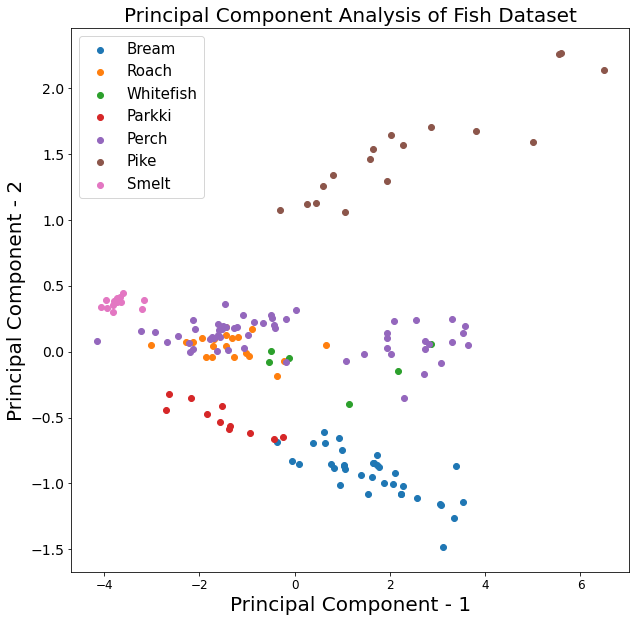

In [26]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Fish Dataset",fontsize=20)
targets = df['Species'].unique()
for target in targets:
    indicesToKeep = df['Species'] == target
    plt.scatter(principal_fish_Df.loc[indicesToKeep, 'principal component 1']
               , principal_fish_Df.loc[indicesToKeep, 'principal component 2'])

plt.legend(targets,prop={'size': 15})